1044
F    591
M    453
Name: sex, dtype: int64 
 GP    772
MS    272
Name: school, dtype: int64


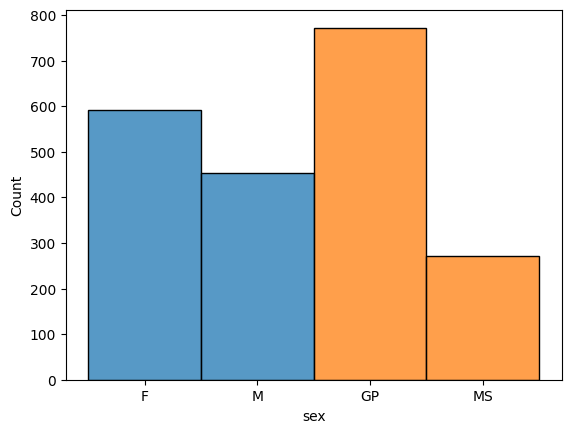

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('bdastudents.csv', sep=';')
print(df.shape[0])
print(df['sex'].value_counts(), '\n', df['school'].value_counts())
sns.histplot(df, x='sex')
sns.histplot(df, x='school')
plt.show()

 0    915
-1     69
 1     60
Name: GRate, dtype: int64


<AxesSubplot:xlabel='age'>

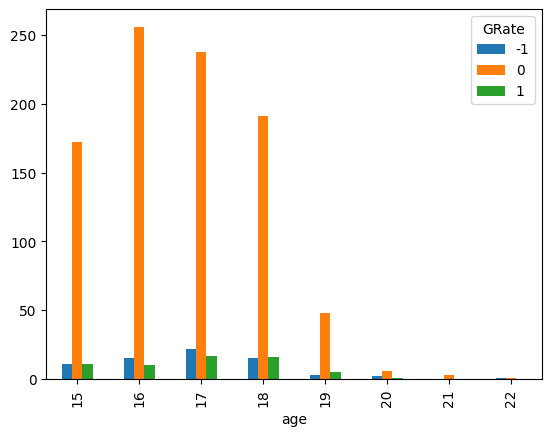

In [78]:
df['GRate'] = df['G1'] - df['G2']
print(df['GRate'].value_counts())
df_age = df.groupby(['age','GRate'])
df_age.size().unstack().plot.bar()

sex  G3
F    0     0.079526
     1     0.717428
     2     0.203046
M    0     0.075055
     1     0.739514
     2     0.185430
dtype: float64


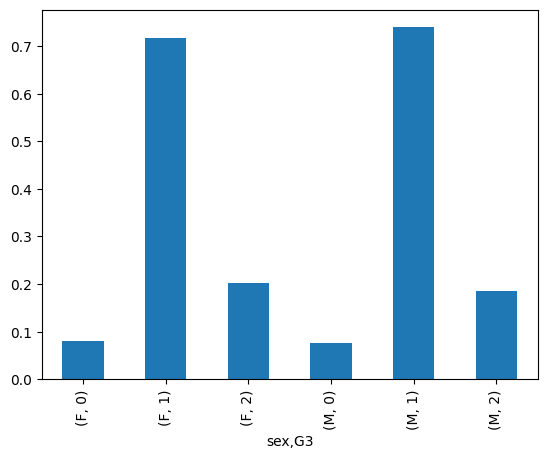

school  G3
GP      0     0.076425
        1     0.707254
        2     0.216321
MS      0     0.080882
        1     0.783088
        2     0.136029
dtype: float64


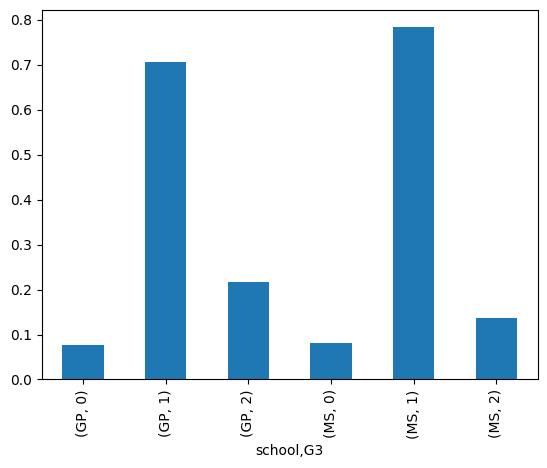

In [79]:
FM_size = df.groupby(['sex']).size()
(df.groupby(['sex','G3']).size()/FM_size).plot(kind='bar')
print((df.groupby(['sex','G3']).size()/FM_size))
plt.show()

FM_size = df.groupby(['school']).size()
(df.groupby(['school','G3']).size()/FM_size).plot(kind='bar')
print((df.groupby(['school','G3']).size()/FM_size))

4    0.293103
2    0.276820
3    0.227969
1    0.193487
0    0.008621
Name: Medu, dtype: float64
2    0.310345
1    0.245211
3    0.221264
4    0.214559
0    0.008621
Name: Fedu, dtype: float64


<AxesSubplot:xlabel='Medu,Fedu'>

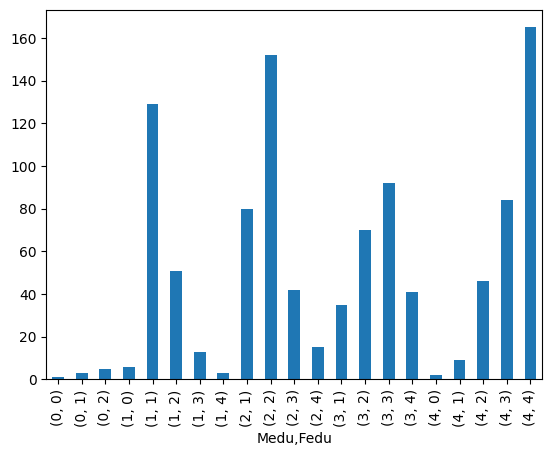

In [80]:
count_value = df['Medu'].shape[0]
print(df['Medu'].value_counts()/count_value)
print(df['Fedu'].value_counts()/count_value)
df_medu = df.groupby(['Medu', 'Fedu'])
df_medu.size().plot.bar()

<AxesSubplot:xlabel='G3,address'>

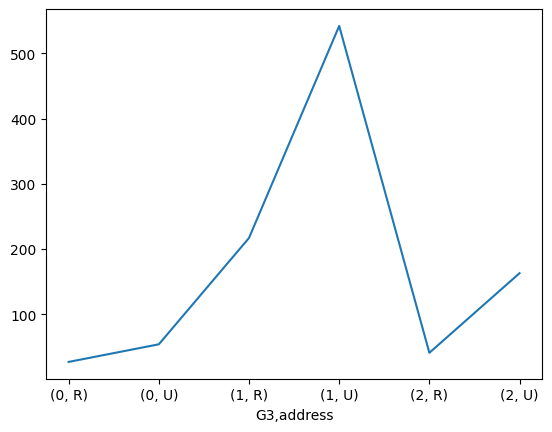

In [81]:
df["G3"].groupby([df["G3"],df["address"]] ).count().plot()

In [82]:
numeric = df.select_dtypes('number')
reduced = df[['G1', 'G2']]
less_reduced = numeric.drop(['G1','G2'], axis=1)

Predizione logistic regression Test: 0.7011494252873564
Predizione logistic regression Test: 0.6954022988505747
Predizione logistic regression Test: 0.9166666666666666


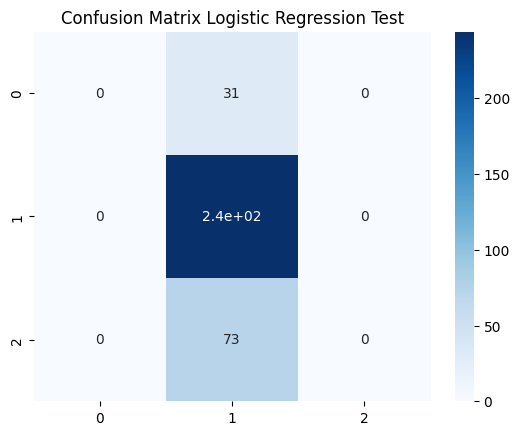

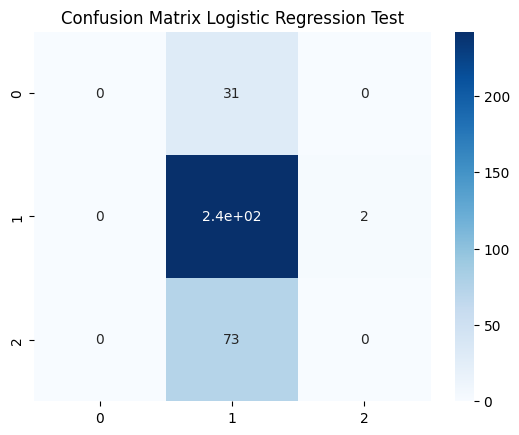

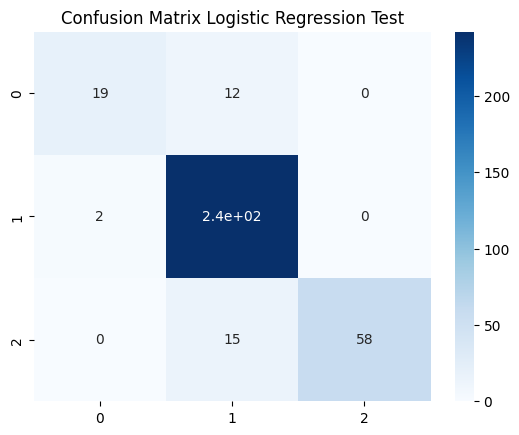

In [83]:
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')

X1 = numeric.drop('G3', axis=1)
X2 = less_reduced.drop('G3', axis=1)
X3 = reduced
y = df['G3']

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=1/3)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=1/3)
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=1/3)

logreg = LogisticRegression()
logreg.fit(X1_train, y_train)

test_pred1 = logreg.predict(X1_test)
print(f'Predizione logistic regression Test: {accuracy_score(y_test, test_pred1)}')

logreg.fit(X2_train, y_train)

test_pred2 = logreg.predict(X2_test)
print(f'Predizione logistic regression Test: {accuracy_score(y_test, test_pred2)}')

logreg.fit(X3_train, y_train)

test_pred3 = logreg.predict(X3_test)
print(f'Predizione logistic regression Test: {accuracy_score(y_test, test_pred3)}')

sns.heatmap(confusion_matrix(y_true=y_test, y_pred=test_pred1), annot=True, cmap='Blues')
plt.title('Confusion Matrix Logistic Regression Test')
plt.show()

sns.heatmap(confusion_matrix(y_true=y_test, y_pred=test_pred2), annot=True, cmap='Blues')
plt.title('Confusion Matrix Logistic Regression Test')
plt.show()

sns.heatmap(confusion_matrix(y_true=y_test, y_pred=test_pred3), annot=True, cmap='Blues')
plt.title('Confusion Matrix Logistic Regression Test')
plt.show()

In [84]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
print('Accuracy Decision Tree con Cross Val ',cross_val_score(tree, X1, y, cv=10, scoring='accuracy').mean())
print('Accuracy Decision Tree con Cross Val ',cross_val_score(tree, X2, y, cv=10, scoring='accuracy').mean())
print('Accuracy Decision Tree con Cross Val ',cross_val_score(tree, X3, y, cv=10, scoring='accuracy').mean())

Accuracy Decision Tree con Cross Val  0.8351648351648351
Accuracy Decision Tree con Cross Val  0.6751373626373627
Accuracy Decision Tree con Cross Val  0.908937728937729


In [85]:
numeric = df.select_dtypes('number')
numeric_cut = pd.cut(numeric['age'], bins=3, labels=[0,1,2])
numeric_cut = pd.DataFrame(numeric_cut, columns=['age'])
numeric.drop('age', axis=1, inplace=True)
numeric = numeric.join(numeric_cut)

X1 = numeric.drop('G3', axis=1)
y = df['G3']

print('Accuracy Decision Tree con Cross Val ',cross_val_score(tree, X1, y, cv=10, scoring='accuracy').mean())

Accuracy Decision Tree con Cross Val  0.8370787545787545


In [86]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
var = encoder.fit_transform(numeric[['age']])
numeric_enc = pd.DataFrame(var.toarray())
numeric_enc = numeric.join(numeric_enc)
numeric_enc.drop('age', axis=1)

X4 = numeric_enc.drop('G3', axis=1)
print('Accuracy Decision Tree con Cross Val ',cross_val_score(tree, X4, y, cv=10, scoring='accuracy').mean())

Accuracy Decision Tree con Cross Val  0.8409432234432235


In [87]:
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder()
var1 = ordinal.fit_transform(df[['Mjob','Fjob']])
numeric_ord = pd.DataFrame(var1, columns=['Mjob','Fjob'])
numeric_ord = numeric.join(numeric_ord)

X5 = numeric_ord.drop('G3', axis=1)
print('Accuracy Decision Tree con Cross Val ',cross_val_score(tree, X5, y, cv=10, scoring='accuracy').mean())

Accuracy Decision Tree con Cross Val  0.8370787545787547


In [88]:
import numpy as np

df = pd.read_csv('bdastudents.csv', sep=';')

df_GP = df[df['school'] == 'GP'].select_dtypes('number')
df_MS = df[df['school'] == 'MS'].select_dtypes('number')

XGP = df_GP.drop('G3', axis=1)
XMS = df_MS.drop('G3', axis=1)
ygp = df_GP['G3']
yms = df_MS['G3']

XGP_train, XGP_test, ygp_train, ygp_test = train_test_split(XGP, ygp, test_size=1/3)
XMS_train, XMS_test, yms_train, yms_test = train_test_split(XMS, yms, test_size=1/3)

treeGP = DecisionTreeClassifier()
treeMS = DecisionTreeClassifier()

XF_test = np.concatenate((XGP_test, XMS_test), axis=0)
yf_test = np.concatenate((ygp_test, yms_test), axis=0)

treeGP.fit(XGP_train, ygp_train)
treeMS.fit(XMS_train, yms_train)

test_pred4 = treeGP.predict(XF_test)
test_pred5 = treeMS.predict(XF_test)
print(f'Predizione decision tree Test: {accuracy_score(yf_test, test_pred4)}')
print(f'Predizione decision tree Test: {accuracy_score(yf_test, test_pred5)}')

Predizione decision tree Test: 0.8481375358166189
Predizione decision tree Test: 0.8424068767908309


In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X1 = numeric.drop('G3', axis=1)
X2 = less_reduced.drop('G3', axis=1)
X3 = reduced
y = df['G3']

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=1/3)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=1/3)
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=1/3)

logreg = LinearRegression()
logreg.fit(X1_train, y_train)

test_pred1 = logreg.predict(X1_test)
print(f'Predizione logistic regression Test: {int(mean_absolute_error(y_test, test_pred1))}')

logreg.fit(X2_train, y_train)

test_pred2 = logreg.predict(X2_test)
print(f'Predizione logistic regression Test: {int(mean_absolute_error(y_test, test_pred2))}')

logreg.fit(X3_train, y_train)

test_pred3 = logreg.predict(X3_test)
print(f'Predizione logistic regression Test: {int(mean_absolute_error(y_test, test_pred3))}')

Predizione logistic regression Test: 0
Predizione logistic regression Test: 0
Predizione logistic regression Test: 0
